# Basic Acoustics 
##### Udacity's VUI Concentration

## Speech signals

Speech propagates as a longitudinal wave in a medium, such as air or water. The speed of propagation depends on the density of the medium. The simplest form of sound that we can describe is called a sinusoid. This waveform corresponds to a pure tone and as we will see later forms the basis for all more complex sounds. Since a sinusoid has such a pure shape it is a useful starting point when describing the properties of sound waves.

Three kinds of measurement can be taken from a sinusoid:

* **Amplitude:** the size of the displacement of the sinusoid above and below the mid line. This corresponds to the energy in the sound wave and hence how loud it appears to be. There are many ways of measuring amplitude; since it relates to the size of the pressure variations in the air it can be measured in units of pressure. More often we talk about deciBels (dB) which measure amplitude on a logarithmic scale relative to a standard sound. The dB scale is useful since it maps directly to the way that humans percieve loudness.

* **Frequency:** the number of cycles made by the sinusoid each second. A cycle consists of an oscilation from the mid line to the maximum, down to the minimum and back to the midline. Frequency is measured in cycles per second or Hertz (Hz). The period is the inverse of this -- the time taken for one cycle. Changes in frequency are percieved as changes in the pitch of a sound (although pitch has a more complicated perceptual definition so the two quanitities are not the same).

* **Phase:** measures the position of the starting point of the sinusoid. Those starting at the maximum have a phase of zero while those starting at the minimum have a phase of π radians. Phase is best explained with reference to a rotating wheel. The phase of a sinusoid cannot be percieved but we can detect relative changes in phase between two signals, in fact this forms the basis of binaural hearing as the brain works out the location of a sound based on the different phases heard at the two ears. Ex. Try to listen Bohemian Rapsody using the right and then the left earplug.

[http://web.science.mq.edu.au/~cassidy/comp449/html/ch03.html]

### A sine function

\begin{equation*}
\ y(t) = A * \sin(2 \pi  f  t + \varphi) = A \sin(\omega  t + \varphi)
\end{equation*}

where:

* A = the amplitude, the peak deviation of the function from zero.
* f = the ordinary frequency, the number of oscillations (cycles) that occur each second of time.
* ω = 2πf, the angular frequency, the rate of change of the function argument in units of radians per second

\varphi  = the phase, specifies (in radians) where in its cycle the oscillation is at t = 0.
When \varphi  is non-zero, the entire waveform appears to be shifted in time by the amount \varphi /ω seconds. A negative value represents a delay, and a positive value represents an advance.

### Adding signals


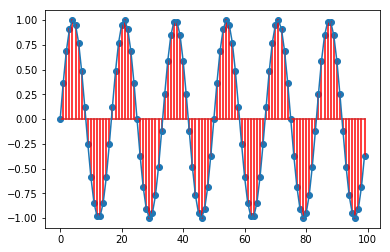

In [22]:
import matplotlib.pyplot as plt 
import numpy as np 

fs = 100 # number of samples
f = 6 # the frequency of the signal

x = np.arange(fs) # points on x axis for plotting
# compute the value (amplitude) of the sin wave at the for each sample
y = [ np.sin(2*np.pi*f * (i/fs)) for i in x]

% matplotlib inline 
plt.stem(x,y, 'r', ) # show points
graph2 = plt.plot(x,y)


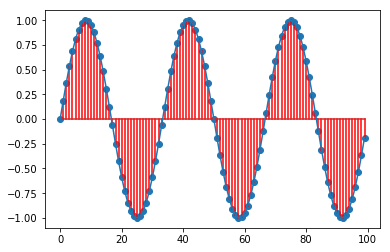

In [23]:
fs = 100 # number of samples
f = 3 # the frequency of the signal

x = np.arange(fs) # points on x axis for plotting
# compute the value (amplitude) of the sin wave at the for each sample
y = [ np.sin(2*np.pi*f * (i/fs)) for i in x]

% matplotlib inline 
plt.stem(x,y, 'r', ) # show points
graph2 = plt.plot(x,y)


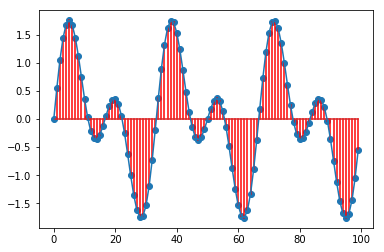

In [24]:
fs = 100 # number of samples
f = 6 # the frequency of the signal

x = np.arange(fs) # points on x axis for plotting
# compute the value (amplitude) of the sin wave at the for each sample
y = [(np.sin(2*np.pi*f * (i/fs)) + (np.sin(2*np.pi*f/2 * (i/fs)))) for i in x]

% matplotlib inline
plt.stem(x,y, 'r', ) # show points
plt.plot(x,y)

## Fourier Theory

The Fourier Transform and the associated Fourier series is one of the most important mathematical tools in physics. Physicist Lord Kelvin remarked in 1867:

>“Fourier’s theorem is not only one of the most beautiful results of modern analysis, but it may be said to furnish an indispensable instrument in the treatment of nearly every recondite question in modern physics.”

The Fourier Transform deals with time based waves – and these are one of the fundamental building blocks of the natural world. Sound, light, gravity, radio signals, Earthquakes and digital compression are just some of the phenomena that can be understood through waves. It’s not an exaggeration therefore to see the study of waves as one of the most important applications of mathematics in our modern life.

[https://ibmathsresources.com/2014/08/14/fourier-transforms-the-most-important-tool-in-mathematics/]


Fourier theory says that any complex periodic waveform can be decomposed into a set of sinusoids with different amplitudes, frequencies and phases. The process of doing this is called Fourier Analysis and the result is a set of amplitudes, phasesand frequencies for each of the sinusoids that makes up the complex waveform. Adding these sinusoids together again will reproduce exactly the original waveform. A plot of the frequency or phase of a sinusoid against amplitude is called a spectrum. 

Any periodic signal shows a pattern of repetition in the time waveform which corresponds to the primary rate of vibration of the signal, known as the fundamental frequency. This corresponds to the lowest major frequency component in the signal and, in the case of voiced speech, equates to the frequency of vibration of the vocal folds. A vibration source like the vocal folds also produces what are called harmonics which are oscillations at multiples of the fundamental frequency. For example, a 100Hz source vibration will give rise to harmonics at 200Hz, 300Hz, 400Hz etc. In the spectrum of such a signal, the harmonics show up as spikes at these frequencies.

The fundamental frequency can be measured from a speech waveform by looking for the period of oscillation of the signal around the zero axis. Estimates can also be made from the spectrum since it shows a large peak at this frequency and at each multiple due to the harmonics. Measurements can be made of the frequency of the major peak or of the distance between harmonic peaks.

### Spectrograms and FFT

A spectrum shows the freqency content of a short section of a waveform but it we want to see how the spectrum changes with time through a section of speech we need a different kind of display. A standard way of displaying this information is a spectrogram; this is a two dimensional plot of frequency against time where the amplitude at each frequency is represented by the darkness of the corresponding point in the display.

<img src= http://web.science.mq.edu.au/~cassidy/comp449/html/wideband.gif />

An FFT, or Fast Fourier Transform, is an efficient implementation of a Discrete Fourier Transform. The algorithm transforms a sum of sinusoidal signals into into its pure frequency components. In the following quiz, we will demonstrate adding sinusoidal waves together and then deconstructing them back into their component frequencies.

* **choose_frequencies** choose three frequencies in a range from 1 to 50. These are the number of full cycles each sinusoidal wave will have in one "time unit". Running the definition will produce a visual of the three chosen frequencies as well as a new wave that is the sum of the three. This is similar to an acoustic signal, which is the sum of many sinusoidal waves. The waves may have different phases and amplitudes as well. Here's an example of a choice of (3, 8, 1) for the three frequencies.

* **add_the_waves** second definition is where the waves are created. For this demonstration, we will only create three. This has been done for you with the utils.make_waves function - take a look at to understand how it works. You just need to add them together. This simulates an audio signal, which is really just sinusoidal waves added together. In audio signals, the sinusoidal waves are created by sound vibrations and may be at varying amplitudes and phase as well as frequency. To simulate this variety, the utils.make_waves function provides random amplitudes and phase shifts.

* **demo_fft** An FFT can be created with a variety of library functions including scipy.fftpack.fft , which we'll use in this quiz. Read the linked reference to understand how to use it in code.

This FFT algorithm will create both positive and negative values, but we'll just display the positive ones. When you're done, you should see something like the following, showing peaks at the three frequency values originally provided!

In [5]:
import matplotlib.pyplot as plt
import numpy as np

def sinusoid(freq):
    """
    return a sinusoidal of random amplitude and phase for a given frequency
    :param freq: 
    :return: 
    """
    phase = np.random.random()
    amplitude = 2 * (np.random.random_integers(1, 10))
    return amplitude * np.cos(2 * np.pi * freq - phase)


def get_wave_timing(num_samples=500, range_of_time = 5.0):
    """
    provide an array of time values of size num_samples spread evenly over range_of_time
    :param num_samples: int 
    :param range_of_time: float
    :return: int, float, np.array
    """
    # sample spacing
    spacing = range_of_time / num_samples
    # array for time samples
    t = np.linspace(0.0, range_of_time, num_samples)
    return num_samples, spacing, t


def make_waves(t, freqs):
    """
    convert three frequencies into arrays of discrete values representing sinusoidal waves
    :param freqs: [float, float, float]
    :return: [np.array, np.array, np.array]
    """
    w0 = sinusoid(t * freqs[0])
    w1 = sinusoid(t * freqs[1])
    w2 = sinusoid(t * freqs[2])
    return w0, w1, w2


def display_sinusoids(time_array, f1, f2, f3, sum):
    # plot three frequencies with random phase shifts on y axis
    plt.figure()
    fig, ax = plt.subplots(4, 1)
    # plt.subplot(411)  # 3 rows, 1 column, fignum 1
    ax[0].plot(time_array, f1)
    ax[0].set_title('1st frequency component')

    # plt.subplot(412)  # 3 rows, 1 column, fignum 2
    ax[1].plot(time_array, f2)
    ax[1].set_title('2nd frequency component')

    # plt.subplot(413)  # 3 rows, 1 column, fignum 3
    ax[2].plot(time_array, f3)
    ax[2].set_title('3rd frequency component')

    # sum
    # plt.subplot(414)  # 3 rows, 1 column, fignum 4
    ax[3].plot(time_array, sum, 'r')
    ax[3].set_title('Sum of components')
    ax[3].set_ylabel('amplitude')
    ax[3].set_xlabel('time')

    # adjust format of display to make room for titles
    plt.subplots_adjust(
         top=0.94,
         bottom=0.11,
         left=0.11,
         right=0.97,
         hspace=0.65,
         wspace=0.2
    )
    plt.show()
    return fig


def display_fft(xf, yf):
    num_samples = np.shape(yf)[0]
    fig, ax = plt.subplots()
    ax.plot(xf, 2.0 / num_samples * np.abs(yf[:num_samples]))
    plt.title('Fast Fourier Transform')
    plt.xlabel('frequency')
    plt.ylabel('amplitude')
    return fig

In [6]:
import numpy as np
import scipy.fftpack
# import utils as utils
import random

def choose_frequencies():
    """
    # provide three frequencies in a range between 1 and 50    
    :return: [int, int, int]
    """
    
    freq1 = random.randint(1, 51)
    freq2 = random.randint(1, 51)
    freq3 = random.randint(1, 51)
   
    return [freq1, freq2, freq3]


def add_the_waves(freqs):
    """
    create three sinusoidal waves and one wave that is the sum of the three
    :param freqs: [int, int, int]
    :return: [np.array, np.array, np.array, np.array]
        representing wave1, wave2, wave3, sum of waves
        each array contains 500(by default) discrete values for plotting a sinusoidal
    """
    _, _, t = get_wave_timing()
    w1, w2, w3 = make_waves(t, freqs)

    sum_waves = w1+w2+w3

    return [w1, w2, w3, sum_waves], t


def demo_fft(sum_waves):
    num_samples, spacing, _ = get_wave_timing()

    # Create a Fast Fourier Transform of the waveform using scipy.fftpack.fft named 'y_fft'
    y_fft = scipy.fftpack.fft(sum_waves)
    x_fft = np.linspace(0.0, 1.0/spacing, num_samples)
    
    return x_fft, y_fft

[15, 1, 4]


/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: This function is deprecated. Please call randint(1, 10 + 1) instead
  # This is added back by InteractiveShellApp.init_path()


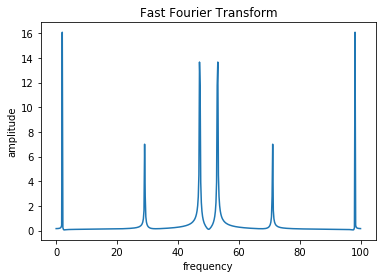

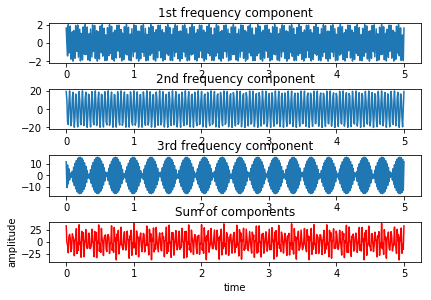

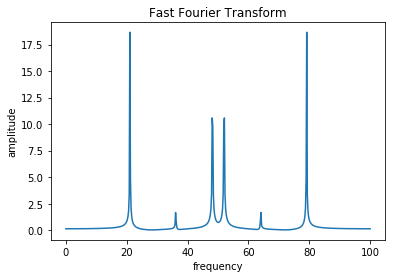

In [7]:
print(choose_frequencies())
waves_list, t = add_the_waves(choose_frequencies())
display_sinusoids(t, waves_list[0], waves_list[1], waves_list[2], waves_list[3])
x_fft, y_fft = demo_fft(waves_list[3])
display_fft(x_fft, y_fft)